### This code no longer works as the component link has changed, and now requires a paywall

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
component = pd.read_html('https://siblisresearch.com/data/historical-components-nasdaq/')[0]
component

,0
0,"Giselda Ribeiro,"
1,giselda(at)siblisresearch.com
2,+63 9 178 6465 242


In [3]:
component.set_index('Ticker', inplace=True)

KeyError: "None of ['Ticker'] are in the columns"

In [ ]:
component = component[component.columns[2:]]

In [ ]:
component.columns = pd.to_datetime(component.columns)

In [ ]:
component = component == 'X'

In [ ]:
tickers = component.index.to_list()
df = yf.download(tickers, start='2016-01-01')['Adj Close']

[*********************100%***********************]  152 of 152 completed

16 Failed downloads:
- VIAB: No timezone found, symbol may be delisted
- YHOO: No data found for this date range, symbol may be delisted
- WLTW: No timezone found, symbol may be delisted
- DISCK: No timezone found, symbol may be delisted
- NLOK: No timezone found, symbol may be delisted
- CELG: No timezone found, symbol may be delisted
- CTXS: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- MXIM: No timezone found, symbol may be delisted
- FOX (OLD): No timezone found, symbol may be delisted
- FOXA (OLD): No timezone found, symbol may be delisted
- LVNTA: No data found for this date range, symbol may be delisted
- DISCA: No timezone found, symbol may be delisted
- ALXN: No timezone found, symbol may be delisted
- FB: No timezone found, symbol may be delisted


In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
component = component.loc[component.index.isin(df.columns)]

In [ ]:
df.index = pd.to_datetime(df.index)
mtl = (df.pct_change() + 1)[1:].resample('M').prod()
mtl.head()

,AAL,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AKAM,ALGN,...,VRTX,VTRS,WBA,WDAY,WDC,WYNN,XEL,XRAY,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31 00:00:00-05:00,0.953068,0.923968,1.0,0.969120,0.989346,1.012428,0.776322,1.045259,0.872109,1.029096,...,0.738465,0.988926,0.959904,0.810314,0.794371,0.979206,1.070589,1.000510,1.0,1.0
2016-02-29 00:00:00-05:00,1.054421,0.998713,1.0,0.955346,0.991943,1.019257,1.105083,1.021900,1.183034,0.998337,...,0.942039,0.855381,0.994862,0.959372,0.907253,1.232686,1.034537,1.035150,1.0,1.0
2016-03-31 00:00:00-04:00,1.000244,1.127210,1.0,1.101585,1.117003,1.065883,1.126981,1.075304,1.029646,1.100863,...,0.929816,1.028400,1.067139,1.271133,1.096576,1.132759,1.066564,1.012307,1.0,1.0
2016-04-30 00:00:00-04:00,0.845891,0.860079,1.0,1.004478,0.951512,0.985843,1.025896,0.956325,0.917581,0.993121,...,1.061014,0.899892,0.941121,0.975794,0.865157,0.945093,0.957197,0.967062,1.0,1.0
2016-05-31 00:00:00-04:00,0.922521,1.071773,1.0,1.055721,1.046255,0.993215,0.974089,1.028208,1.070406,1.091979,...,1.104458,1.039079,0.980777,1.011470,1.138732,1.095103,1.033475,1.042953,1.0,1.0


In [ ]:
def get_rolling_ret(df,n):
    return df.rolling(n).apply(np.prod)

In [ ]:
ret_12, ret_6, ret_3 = get_rolling_ret(mtl,12), get_rolling_ret(mtl,6), get_rolling_ret(mtl,3)

In [ ]:
def get_relevant(date):
    ix = np.argmax(pd.to_datetime(date))# >= component.columns)
    return component[component.iloc[:,ix]].index

In [ ]:
def filter_ret(date,ret_df):
    return ret_df[get_relevant(date)]

In [ ]:
def get_top(date):
    ret_12m, ret_6m, ret_3m = filter_ret(date,ret_12), filter_ret(date,ret_6), filter_ret(date,ret_3)
    
    top_50 = ret_12m.loc[date].nlargest(50).index
    top_30 = ret_6m.loc[date].nlargest(30).index
    top_10 = ret_3m.loc[date].nlargest(10).index
    return top_10

In [ ]:
def performance(date):
    portfolio = mtl.loc[date:,get_top(date)][1:2]
    return portfolio.mean(axis=1)

In [ ]:
rets = []

for date in mtl.index:
    pf_per = performance(date)
    rets.append(pf_per)

In [ ]:
rets_fin = pd.concat(rets)

<AxesSubplot: xlabel='Date'>

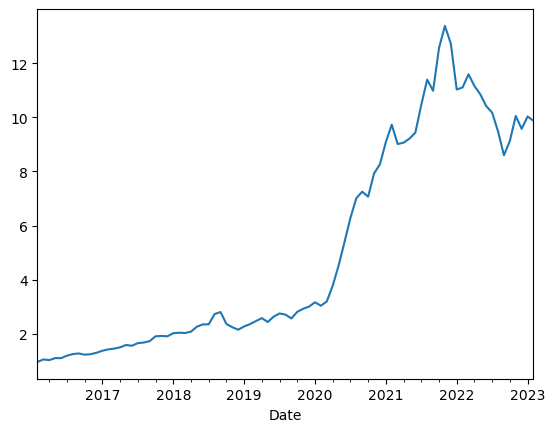

In [ ]:
rets_fin.cumprod().plot()

In [ ]:
rets_fin.cumprod()

Date
2016-02-29 00:00:00-05:00     0.961839
2016-03-31 00:00:00-04:00     1.052852
2016-04-30 00:00:00-04:00     1.029554
2016-05-31 00:00:00-04:00     1.103340
2016-06-30 00:00:00-04:00     1.101399
                               ...    
2022-10-31 00:00:00-04:00     9.126137
2022-11-30 00:00:00-05:00    10.052321
2022-12-31 00:00:00-05:00     9.573987
2023-01-31 00:00:00-05:00    10.031484
2023-02-28 00:00:00-05:00     9.874390
Freq: M, Length: 85, dtype: float64

In [ ]:
nas_BH = yf.download('QQQ', start='2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
(nas_BH.pct_change() + 1).cumprod()

Date
2017-01-03 00:00:00-05:00         NaN
2017-01-04 00:00:00-05:00    1.005437
2017-01-05 00:00:00-05:00    1.011126
2017-01-06 00:00:00-05:00    1.019994
2017-01-09 00:00:00-05:00    1.023340
                               ...   
2023-02-22 00:00:00-05:00    2.571012
2023-02-23 00:00:00-05:00    2.593467
2023-02-24 00:00:00-05:00    2.550042
2023-02-27 00:00:00-05:00    2.568303
2023-02-28 00:00:00-05:00    2.575730
Name: Adj Close, Length: 1549, dtype: float64

---

### Recent Monthly Performance Backtest

In [ ]:
latest = '2023-01-31'

top_perf = get_top(latest)
top_perf = top_perf.to_list()
top_perf

['PDD', 'BIDU', 'NTES', 'JD', 'PTON', 'NVDA', 'ASML', 'ALGN', 'IDXX', 'OKTA']

In [ ]:
recent_data = yf.download(top_perf, start=latest)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [ ]:
recent_data = (recent_data.pct_change() + 1).cumprod()
rec_data = recent_data.mean(axis=1)
rec_data

Date
2023-01-31 00:00:00-05:00         NaN
2023-02-01 00:00:00-05:00    1.068453
2023-02-02 00:00:00-05:00    1.112628
2023-02-03 00:00:00-05:00    1.071702
2023-02-06 00:00:00-05:00    1.058976
2023-02-07 00:00:00-05:00    1.087738
2023-02-08 00:00:00-05:00    1.064434
2023-02-09 00:00:00-05:00    1.054353
2023-02-10 00:00:00-05:00    1.020532
2023-02-13 00:00:00-05:00    1.039309
2023-02-14 00:00:00-05:00    1.052256
2023-02-15 00:00:00-05:00    1.063477
2023-02-16 00:00:00-05:00    1.046458
2023-02-17 00:00:00-05:00    1.021311
2023-02-21 00:00:00-05:00    0.980182
2023-02-22 00:00:00-05:00    0.976914
2023-02-23 00:00:00-05:00    0.993809
2023-02-24 00:00:00-05:00    0.968194
2023-02-27 00:00:00-05:00    0.979463
2023-02-28 00:00:00-05:00    0.984303
dtype: float64

<AxesSubplot: xlabel='Date'>

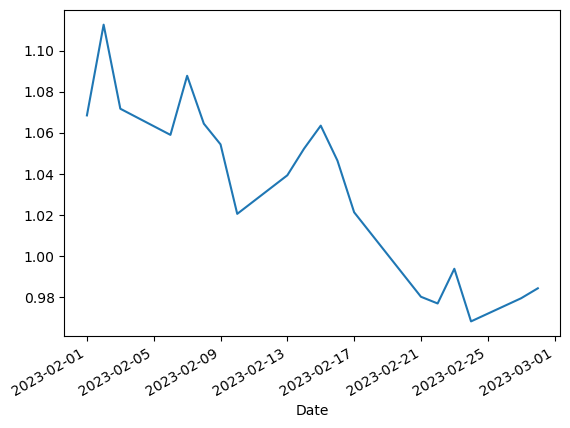

In [ ]:
rec_data.plot()